In [2]:
import numpy as np
from glob import glob

spectra = []
au = []
with open("data/20231109-finger/2index_600_785 nm_120 s_1_2023_11_09_17_55_31_01.txt", 'r') as f:
    for line in f.readlines():
        line = line.rstrip("\n")
        if(line[0] == '#'): continue
        x,y = tuple(line.split("\t"))
        spectra.append(float(x))
        au.append(float(y))

spectra = np.array(spectra)[:550]
au = np.array(au)[:550]

spectra.shape, au.shape

((550,), (550,))

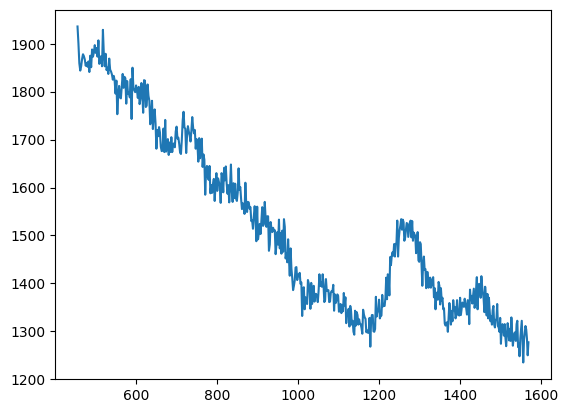

In [3]:
import matplotlib.pyplot as plt

plt.plot(spectra, au)

In [4]:
from dsatools import decomposition
# https://github.com/MVRonkin/dsatools/blob/master/dsatools/_base/_imf_decomposition/_hvd.py
psds = decomposition.hvd(au, order=6, fpar=30)
# psds = decomposition.emd(au,order=6, method='rbf', max_itter=1000, tol=0.001)


/root/projects/python/.venv/lib/python3.10/site-packages/dsatools/_base/_imf_decomposition/_hvd.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  imf[i,:] = env*np.exp(1j*(2*np.pi*f[i]*n+phase0))


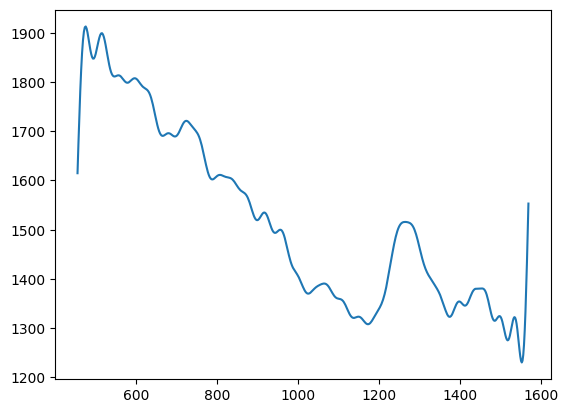

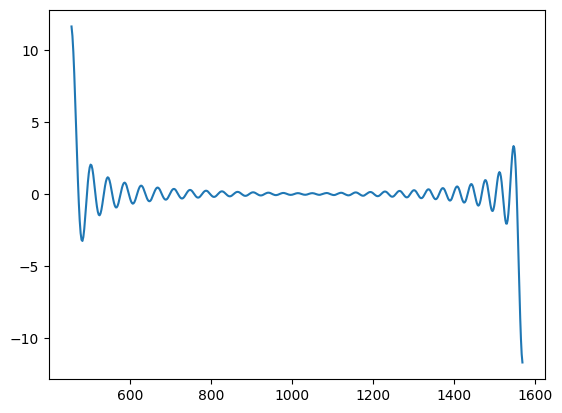

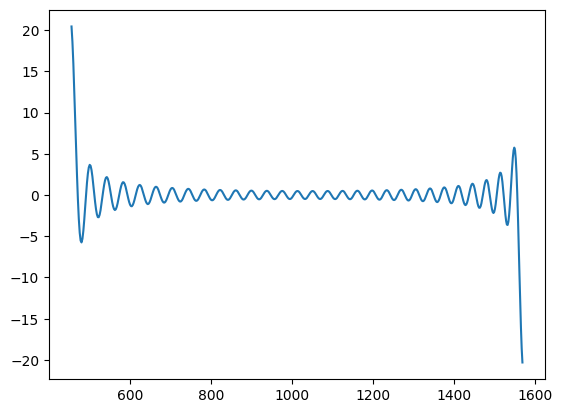

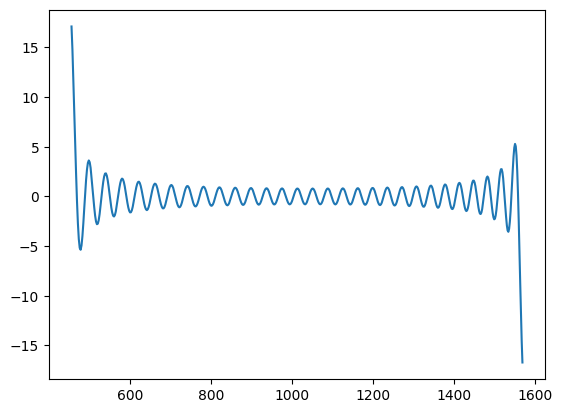

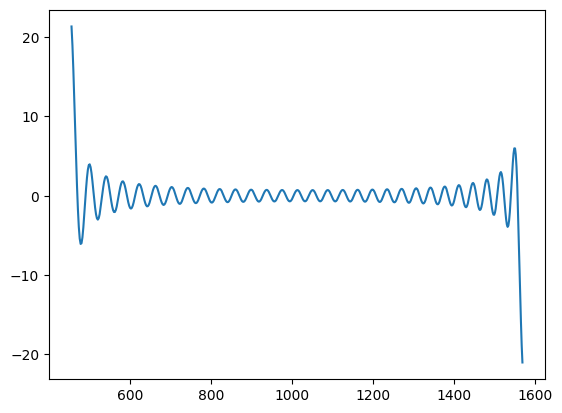

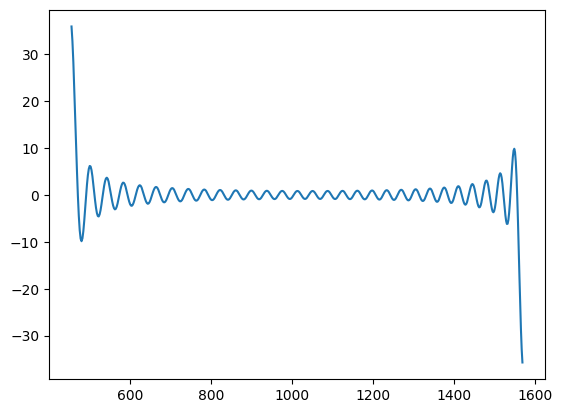

In [5]:
for s in psds:
    # plt.plot(spectra, au)
    plt.plot(spectra, s)
    plt.show()